<a href="https://colab.research.google.com/github/hoiyurie/tibame-ml0602/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlretrieve
url = "https://github.com/hoiyurie/tibame-ml0602/raw/main/titanic/train.csv"
urlretrieve(url,"train.csv")
url = "https://github.com/hoiyurie/tibame-ml0602/raw/main/titanic/test.csv"
urlretrieve(url,"test.csv")


('test.csv', <http.client.HTTPMessage at 0x7f4e38950b90>)

In [3]:
import pandas as pd
train_df = pd.read_csv("train.csv",encoding="utf-8")
test_df = pd.read_csv("test.csv",encoding="utf-8")

In [4]:
# 先把train data 和test data 兩個表格連結起來
data = pd.concat([train_df, test_df],ignore_index = True) # ingnore_index = True 重置合併後的index
data = data.drop(["PassengerId","Survived"], axis = 1)
# data

In [5]:
# 查看空值 data.isna（）
# 查看空值總數 data.isna().sum()
# 對Series做篩選[帶入跟你的資料筆數一樣多True/False list]

na = data.isna().sum()
na[na>0].sort_values(ascending= False) # ascending = False 小-大



Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [6]:
# # apply 

# s = pd.Series([1,2,3])
# def func(n):
#   return n * n 
# s.apply(func)


# # lambda = def 
# # 多行 def
# # 少數幾行 lambda

# s= pd.Series([1, 2, 3])
# def func(n):
#   return n * n
# s.apply(lambda n:n*3)


# # 可以直接寫成
# s= pd.Series([1, 2, 3])
# s.apply(lambda n:n*3)


In [7]:
# 先處理一些數據：

#Cabin 取出首字母，可能代表艙位等級

def cabin_head(s):
  if not pd.isna(s):
    return s[0]
  # else:
  #   return s  # 回傳NAN

data["Cabin"] = data["Cabin"].apply(cabin_head)


In [8]:
# Ticket 可以看出同行人數

dic = data["Ticket"].value_counts()
data["Ticket"] = data["Ticket"].apply(lambda t:dic[t])

In [9]:
# 補缺失值（類別：最常出現）
# ！！！如果有一堆測試資料，不要重新算，直接補S(補最多的) !!!! 

# Embarked  登船點--> 補成 最多人使用的登船點
# data["Embarked"]

most = data["Embarked"].value_counts().idxmax() # idxmax 最大值的索引
data["Embarked"] = data["Embarked"].fillna(most)
na = data.isna().sum()
na[na > 0].sort_values(ascending = False)


Cabin    1014
Age       263
Fare        1
dtype: int64

In [10]:
# 補缺失值（數值：中位數）

med = data.median().drop(["Pclass"]) # Pclass 不能補中位數, 先除掉
data = data.fillna(med)
na = data.isna().sum()
na[na > 0].sort_values(ascending = False)

Cabin    1014
dtype: int64

In [11]:
# data --> 看名字


In [12]:
# Braund, Mr. Owen Harris

def name_convert(s):
  s = s.split(",")[-1].split(".")[0] # 把Braund, Mr. Owen Harris 切割，取出Mr
  s= s.strip() # 去掉前後空格
  return s 
counts = data["Name"].apply(name_convert).value_counts()
whitelist = counts[counts > 50].index
# whitelist
def name_convert(s):
  s = s.split(",")[-1].split(".")[0]
  s = s.strip()
  if s in whitelist:
    return s
  else:
    return None
  
data["Name"] = data["Name"].apply(name_convert)


In [13]:
# One-Hot encoding

data = pd.get_dummies(data)
data = pd.get_dummies(data, columns=["Pclass"])
data


# 特別針對Pclass再做一次one-hot



,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [14]:
# 模型建立完, 後續的嘗試, 只是我嘗試過, 所以我直接做
data["Family"] = data["SibSp"] + data["Parch"]
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [15]:
#### RandomForest


In [16]:
print(len(data))
print(data.shape)

1309
(1309, 26)


In [17]:
# .loc(根據列編號)（X)   
# .iloc(根據第幾個)(O)
# .iloc[第一列，第二列，第三列...]

x_train = data.iloc[:train_df.shape[0]]
y_train = train_df["Survived"]
x_predict = data.iloc[train_df.shape[0]:]
# x_train


In [18]:
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [22]:
# # 利用GridSearchCV 找參數


import numpy as np
from sklearn.model_selection import GridSearchCV  
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
params = {
    # 1. 5 2. [1, 2, 3] 3. range
    # 20~99
    "n_estimators":range(20, 100),
    # 3~10
    "max_depth":range(3, 11)
}
clf = RandomForestClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
# cv.fit(x_train, y_train)
# print(cv.best_score_)
# print(cv.best_params_)

# # RandomForest 可以 classifier/regressor/embedding 

In [23]:
clf = RandomForestClassifier()

In [24]:
# 利用GridSearchCV 找到參數的參數再調整


clf = RandomForestClassifier(n_estimators=25, max_depth=8) 
 # n_estimators 隨機森林的數量（20~100）
scores = cross_val_score(clf, x_train, y_train, cv=10, n_jobs=-1)
# cv就寫10就好
print("10:", scores)
print("average:", np.average(scores))

clf.fit(x_train,y_train)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})

df.to_csv("rf.csv",encoding = "utf-8", index=False)
df

10: [0.8        0.87640449 0.71910112 0.88764045 0.88764045 0.84269663
 0.84269663 0.76404494 0.87640449 0.82022472]
average: 0.8316853932584269


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


25


[Text(279.0, 475.65000000000003, 'Name_Mrs <= 0.5\ngini = 0.467\nsamples = 561\nvalue = [560, 331]\nclass = Dead'),
 Text(139.5, 339.75, 'Sex_male <= 0.5\ngini = 0.423\nsamples = 484\nvalue = [532, 232]\nclass = Dead'),
 Text(69.75, 203.85000000000002, 'Pclass_3 <= 0.5\ngini = 0.461\nsamples = 121\nvalue = [75, 133]\nclass = Alived'),
 Text(34.875, 67.94999999999999, '\n  (...)  \n'),
 Text(104.625, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 203.85000000000002, 'Family <= 1.5\ngini = 0.293\nsamples = 363\nvalue = [457, 99]\nclass = Dead'),
 Text(174.375, 67.94999999999999, '\n  (...)  \n'),
 Text(244.125, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 339.75, 'Pclass_3 <= 0.5\ngini = 0.344\nsamples = 77\nvalue = [28, 99]\nclass = Alived'),
 Text(348.75, 203.85000000000002, 'Embarked_S <= 0.5\ngini = 0.116\nsamples = 48\nvalue = [5, 76]\nclass = Alived'),
 Text(313.875, 67.94999999999999, '\n  (...)  \n'),
 Text(383.625, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 203.

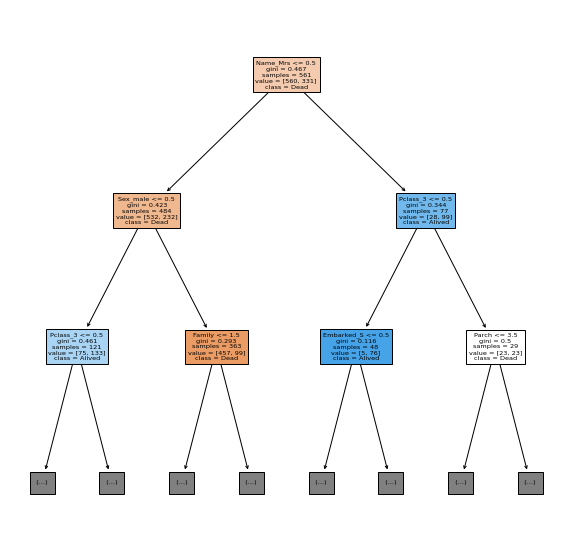

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
print(len(clf.estimators_))
plt.figure(figsize=(10, 10))
plot_tree(clf.estimators_[2],   # 查看第三顆樹的decision tree
          feature_names=data.columns, 
          class_names=["Dead", "Alived"],
          max_depth=2,
          filled=True)

In [26]:
# 特徵重要性

pd.DataFrame({
    "Name":data.columns,
    "Importance":clf.feature_importances_
}).sort_values(by="Importance", ascending=False)



,Name,Importance
9,Sex_female,0.137074
7,Name_Mr,0.126292
10,Sex_male,0.126261
4,Fare,0.118474
0,Age,0.086666
24,Pclass_3,0.065652
3,Ticket,0.057129
25,Family,0.043776
8,Name_Mrs,0.039502
1,SibSp,0.030652


可以看出 sex/age/fare 重要性都很高



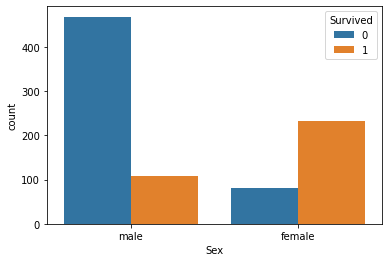

In [30]:
# sex 畫圖

import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

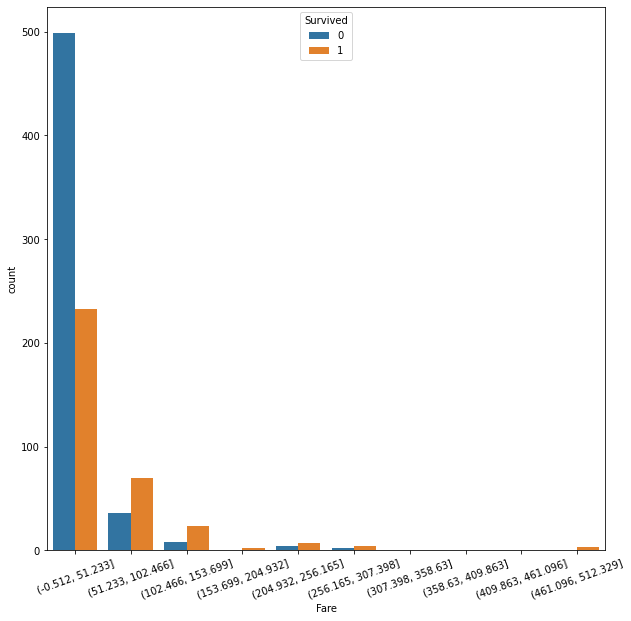

In [31]:
# fare畫圖
plt.figure(figsize=(10, 10))
c = pd.cut(train_df["Fare"], bins=10)
sns.countplot(c, hue=train_df["Survived"])
plt.xticks(rotation=20) # rotation x軸名稱傾斜度

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

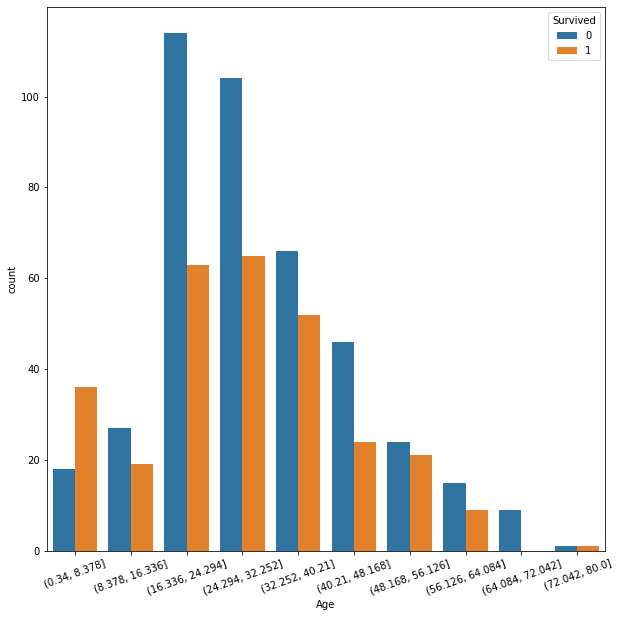

In [32]:
# age畫圖

plt.figure(figsize=(10, 10))
c = pd.cut(train_df["Age"], bins=10)
sns.countplot(c, hue=train_df["Survived"])
plt.xticks(rotation=20)

In [ ]:
# KNN

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns=data.columns)
# .loc (根據列編號)(X) .iloc (根據第幾個)(O)
# .iloc [第一列, 第二列, 第三列...]
x_train_scale = data_scale.iloc[:train_df.shape[0]]
x_predict_scale = data_scale.iloc[train_df.shape[0]:]
x_train_scale



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
params = {
    "n_neighbors":range(3, 100)
}
clf = KNeighborsClassifier()
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_train_scale, y_train)
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df